In [2]:
# imports 
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

#and visualization setup
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from matplotlib import cm

In [3]:
df_stations_and_traffic_marged=pd.read_csv('df_stations_and_traffic_marged.csv')
df_stations_and_traffic_marged

,Unnamed: 0,stationId,Rain,WSmax,WDmax,WS,WD,STDwd,TD,RH,...,TDmin,WS1mm,Ws10mm,year,month,Grad,TG,BP,avg_month_road_loads,dirct_road_loads
0,55,42,0.000000,7.282857,241.885714,5.475000,240.657143,10.381429,NaN,NaN,...,NaN,6.315714,5.661429,2021,8,NaN,NaN,NaN,40.4,0
1,84,45,0.000000,5.318182,273.104895,2.844755,283.027972,19.444755,25.118881,71.447552,...,24.948252,3.954545,3.059441,2018,7,NaN,NaN,NaN,15.0,0
2,100,45,0.000000,3.578322,223.258741,2.140559,220.286713,14.280420,20.940559,73.153846,...,20.830070,2.841259,2.290909,2019,11,NaN,NaN,NaN,14.8,0
3,107,45,0.000000,4.314685,230.650350,2.432867,224.475524,19.653147,21.137762,65.482517,...,20.986713,3.306294,2.625175,2020,6,NaN,NaN,NaN,15.9,0
4,121,45,0.000000,3.914493,236.789855,2.306522,235.811594,15.929710,27.294928,75.862319,...,27.148551,3.098551,2.463768,2021,8,NaN,NaN,NaN,15.8,0
5,179,54,0.000000,2.188811,152.440559,1.460839,154.594406,12.655944,15.897203,76.398601,...,15.757343,1.896503,1.623077,2020,12,NaN,16.401399,1008.696503,124.5,0
6,245,178,0.000000,3.888112,156.167832,2.830769,164.818182,8.923776,17.841958,68.335664,...,17.738462,3.328671,2.979021,2020,12,NaN,NaN,NaN,179.8,0
7,253,178,0.000000,3.142029,227.115942,2.142029,228.768116,12.376087,28.844928,67.804348,...,28.739130,2.646377,2.256522,2021,8,NaN,NaN,NaN,222.5,0
8,311,275,0.000000,NaN,NaN,NaN,NaN,NaN,17.562369,71.547038,...,NaN,NaN,NaN,2020,12,NaN,NaN,NaN,99.8,0
9,319,275,0.000000,NaN,NaN,NaN,NaN,NaN,28.641155,70.429603,...,NaN,NaN,NaN,2021,8,NaN,NaN,NaN,92.8,0


In [4]:
df_stations_and_traffic_marged.drop(columns = df_stations_and_traffic_marged.columns[0],axis=1,inplace=True)
df_stations_and_traffic_marged.drop(['stationId','year','month'],axis=1,inplace=True)
df_stations_and_traffic_marged.fillna(0,inplace=True)
df_stations_and_traffic_marged = df_stations_and_traffic_marged.div(df_stations_and_traffic_marged.sum(axis=1), axis=0) # normalize data
df_stations_and_traffic_marged_copy=df_stations_and_traffic_marged.copy()
df_stations_and_traffic_marged

,Rain,WSmax,WDmax,WS,WD,STDwd,TD,RH,TDmax,TDmin,WS1mm,Ws10mm,Grad,TG,BP,avg_month_road_loads,dirct_road_loads
0,0.000000,0.013050,0.433441,0.009811,0.431239,0.018603,0.000000,0.000000,0.000000,0.000000,0.011317,0.010145,0.000000,0.000000,0.000000,0.072394,0.0
1,0.000000,0.007067,0.362905,0.003780,0.376091,0.025838,0.033378,0.094940,0.033595,0.033152,0.005255,0.004065,0.000000,0.000000,0.000000,0.019932,0.0
2,0.000000,0.005777,0.360412,0.003456,0.355614,0.023053,0.033805,0.118094,0.033985,0.033627,0.004587,0.003698,0.000000,0.000000,0.000000,0.023892,0.0
3,0.000000,0.006824,0.364807,0.003848,0.355040,0.031084,0.033432,0.103570,0.033671,0.033193,0.005229,0.004152,0.000000,0.000000,0.000000,0.025148,0.0
4,0.000000,0.005809,0.351398,0.003423,0.349947,0.023640,0.040506,0.112580,0.040706,0.040289,0.004598,0.003656,0.000000,0.000000,0.000000,0.023447,0.0
5,0.000000,0.001368,0.095243,0.000913,0.096589,0.007907,0.009932,0.047733,0.010018,0.009845,0.001185,0.001014,0.000000,0.010247,0.630221,0.077786,0.0
6,0.000000,0.006032,0.242269,0.004391,0.255688,0.013844,0.027679,0.106012,0.027851,0.027518,0.005164,0.004621,0.000000,0.000000,0.000000,0.278930,0.0
7,0.000000,0.003674,0.265541,0.002504,0.267473,0.014470,0.033725,0.079276,0.033860,0.033601,0.003094,0.002638,0.000000,0.000000,0.000000,0.260144,0.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.092967,0.378737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.528296,0.0
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.149273,0.367068,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483659,0.0


In [5]:
df_stations_and_traffic_marged_copy.drop(['Rain','TG'],axis=1,inplace=True)

## Linear Regression

In [21]:
TRAINING_FEATURES = df_stations_and_traffic_marged_copy.columns[df_stations_and_traffic_marged_copy.columns != 'avg_month_road_loads']
TARGET_FEATURE = 'avg_month_road_loads'

x = df_stations_and_traffic_marged_copy[TRAINING_FEATURES] 
y = df_stations_and_traffic_marged_copy[TARGET_FEATURE] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
# y_train=y_train.values.reshape(y_train.size,1)
# y_test=y_test.values.reshape(y_test.size,1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(42, 14) (42,)
(14, 14) (14,)


In [22]:
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(x_train, y_train)
lrm_predictions = lrm.predict(x_test)
lrm_predictions

array([0.52620732, 0.09856908, 0.01982942, 0.05149754, 0.21377021,
       0.12926852, 0.00955128, 0.26911893, 0.13202403, 0.0337785 ,
       0.23305524, 0.29597724, 0.00862804, 0.04677596])

In [23]:
print("Score: ", lrm_model.score(x_test, y_test))

Score:  0.9647073857631163


In [24]:
column_labels = x.columns.tolist()
coef = lrm.coef_.squeeze().tolist()

# Zip together & sort list
labels_coef = list(zip(column_labels, coef))
labels_coef.sort(key=lambda x:x[1], reverse=True)

# Verify the result
print(labels_coef)

[('WS', 90.00526516399259), ('WSmax', 17.31163679866624), ('TDmin', 8.658902952619732), ('dirct_road_loads', 0.0), ('STDwd', -0.4989266449319193), ('WD', -0.9579120634238183), ('TD', -1.069948881197041), ('BP', -1.0930891262860596), ('Grad', -1.1407613951875022), ('WDmax', -1.1911994544763669), ('RH', -1.1932668065479157), ('TDmax', -11.349774752458362), ('WS1mm', -38.739563138601866), ('Ws10mm', -67.08296248837922)]


<AxesSubplot:xlabel='WS', ylabel='avg_month_road_loads'>

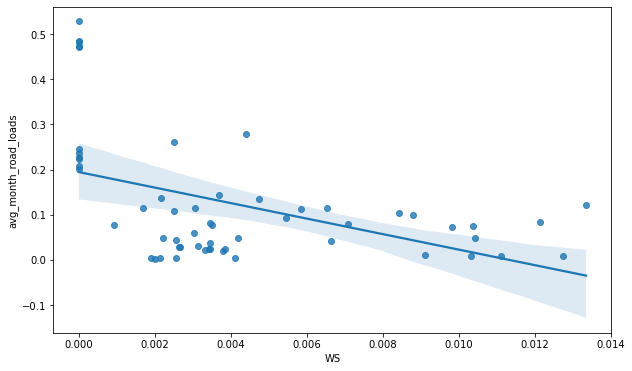

In [12]:
import seaborn as sns

sns.regplot(x='WS', y='avg_month_road_loads', data=df_stations_and_traffic_marged_copy)